# Subject: Data Science Foundation

## Session 9 - Data Exploration and Imputation

### Demo1 -  Data Exploration and Imputation for pandas Dataframe "Titanic"

Before exploring deeper questions, you have to answer many simpler ones about the form and quality of data. That said, it is important to go into your initial data exploration with a big picture question in mind since the goal of your analysis should inform how you prepare the data.

## 1. Exploring The Variables

The first step in exploratory analysis is reading in the data and then exploring the variables. It is important to get a sense of how many variables and cases there are, the data types of the variables and the range of values they take on.
We'll start by reading in the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Data Science Foundations/Session_9_DSF/1_titanic_dataset.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It's a good idea to start off by checking the dimensions of your data set with df.shape and the variable data types of df.dtypes.

In [2]:
df.shape           # Check dimensions

(891, 12)

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The output shows us that we're working with a set of 889 records and 12 columns. Several of the column variables are encoded as numeric data types (ints and floats) but a few of them are encoded as "object". Let's check the head of the data to get a better sense of what the variables look like:

In [4]:
print(df.head(5))  # Check the first 5 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


It appears we have a mixture of numeric columns and columns with text data. In data analysis, variables that split records into a fixed number of unique categories, such as Sex, are known as categorical variables. Pandas will attempt to interpret categorical variables as such when you load data, but you can specifically convert a variable to categorical if necessary, as we'll see later.

After getting a sense of the data's structure, it is a good idea to look at a statistical summary of the variables with df.describe():

In [5]:
print( df.describe() )

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Notice that non-numeric columns are dropped from the statistical summary provided by df.describe().
We can get a summary of the categorical variables by passing only those columns to describe():

In [6]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Abbing, Mr. Anthony",male,347082,G6,S
freq,1,577,7,4,644


The categorical variable summary shows the count of non-NaN records, the number of unique categories, the most frequently occurring value and the number of occurrences of the most frequent value.

Although describe() gives a concise overview of each variable, it does not necessarily give us enough information to determine what each variable means. Certain variables like "Age" and "Fare" are self-explanatory, while others like "SibSp" and "Parch" are not. Whoever collects or provides data for download should also provide a list of variable descriptions. In this case, Kaggle provides a list of descriptions on the data download page:

In [7]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

After looking at the data for the first time, you should ask yourself a few questions:

1. Do I need all of the variables?
2. Should I transform any variables?
3. Are there NA values, outliers or other strange values?
4. Should I create new variables?

For the rest of this component of the lesson we will address each of these questions in the context of this data set.

## 2. Exploring The Variables

Let's go through each variable and consider whether we should keep it or not in the context of predicting survival:

"PassengerId" is just a number assigned to each passenger. It is nothing more than an arbitrary identifier; we could keep it for identification purposes, but let's remove it anyway:

In [8]:
del df["PassengerId"]     # Remove PassengerId

"Survived" indicates whether each passenger lived or died. Since predicting survival is our goal, we definitely need to keep it.

Features that describe passengers numerically or group them into a few broad categories could be useful for predicting survival. The variables Pclass, Sex, Age, SibSp, Parch, Fare and Embarked appear to fit this description, so let's keep all of them.

We have 3 more features to consider: Name, Ticket and Cabin.

"Name" appears to be a character string of the name of each passenger. Let's look at name a little closer:

In [9]:
sorted(df["Name"])[0:15]   # Check the first 15 sorted names

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [10]:
df["Name"].describe()

count                     891
unique                    891
top       Abbing, Mr. Anthony
freq                        1
Name: Name, dtype: object

From the output above, we see that the Name variable has 889 unique values. Since there are 889 rows in the data set we know each name is unique. It appears that married women have their maiden names listed in parentheses. In general, a categorical variable that is unique to each case isn't useful for prediction. 

Next, let's look closer at "Ticket":

In [11]:
df["Ticket"][0:15]       # Check the first 15 tickets

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [12]:
df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Ticket has 681 unique values: almost as many as there are passengers. Categorical variables with almost as many levels as there are records are generally not very useful for prediction. Let's remove it:

In [13]:
del df["Ticket"]        # Remove Ticket

Finally let's consider the "Cabin" variable:

In [14]:
df["Cabin"][0:15]       # Check the first 15 tickets

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [15]:
df["Cabin"].describe()  # Check number of unique cabins

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

Cabin also has 145 unique values, which indicates it may not be particularly useful for prediction. 

Data projects are iterative processes: you can start with a simple analysis or model using only a few variables and then expand later by adding more and more of the other variables you initially ignored or removed.

## 3. Should I Transform Any Variables?

Survived is just an integer variable that takes on the value 0 or 1 depending on whether a passenger died or survived respectively. Variables that indicate a state or the presence or absence of something with the numbers 0 and 1 are sometimes called indicator variables or dummy variables (0 indicates absence and 1 indicates presence.). Indicator variables are essentially just a shorthand for encoding a categorical variable with 2 levels. We could instead encode Survived as a categorical variable with more descriptive categories:

In [16]:
new_survived = pd.Categorical(df["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


Survived looks a little nicer as categorical variable with appropriate category names, but even so, we're not going to change it. Why not? If you remember, our goal with this data set is predicting survival for the Kaggle competition. It turns out that when submitting predictions for the competition, the predictions need to be encoded as 0 or 1. It would only complicate things to transform Survived, only to convert it back to 0 and 1 later.

There's one more variable that has a questionable data encoding: Pclass. Pclass is an integer that indicates a passenger's class, with 1 being first class, 2 being second class and 3 being third class. Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric variable. What's more 1st class would be considered "above" or "higher" than second class, but when encoded as an integer, 1 comes before 2. We can fix this by transforming Pclass into an ordered categorical variable:

In [17]:
new_Pclass = pd.Categorical(df["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [18]:
df["Pclass"] = new_Pclass

In [19]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0,Class3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,Class1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,Class3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,1,Class3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,Class2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


Now it's time to revisit the Cabin variable. It appears that each Cabin is in a general section of the ship indicated by the capital letter at the start of each factor level:

In [20]:
df["Cabin"].unique()   # Check unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

If we grouped cabin just by this letter, we could reduce the number of levels while potentially extracting some useful information.

In [21]:
char_cabin = df["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


The output of describe() shows we succeeded in condensing Cabin into a handful of broader categories, but we also discovered something interesting: 688 of the records have Cabin are "n" which is shortened from "nan". In other words, more than 2/3 of the passengers do not have a cabin listed at all.

Since there are so many missing values, the Cabin variable might be devoid of useful information for prediction.  On the other hand, a missing cabin variable could be an indication that a passenger died: after all, how would we know what cabin a passenger stayed in if they weren't around to tell the tale? Let's keep the new cabin variable:

In [22]:
df["Cabin"] = new_Cabin

## 4. Are there NA Values, Outliers or Other Strange Values?

Data sets are often littered with missing data, extreme data points called outliers and other strange values. Missing values, outliers and strange values can negatively affect statistical tests and models and may even cause certain functions to fail.
In Python, you can detect missing values with the pd.isnull() function:

Detecting missing values is the easy part: it is far more difficult to decide how to handle them. In cases where you have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. On the other hand, if you have more than a handful of missing values, removing records with missing values could cause you to get rid of a lot of data. Missing values in categorical data are not particularly troubling because you can simply treat NA as an additional category. Missing values in numeric variables are more troublesome, since you can't just treat a missing value as number. As it happens, the Titanic dataset has some NA's in the Age variable:

In [23]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Notice the count of age(712) is less than the total row count of hte data set(889). This indicates missing data. We can get the row indexes of the missing values with np.where():

In [24]:
missing = np.where(df["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [25]:
len(missing[0])

177

With 177 missing values it's probably not a good idea to throw all those records away. Here are a few ways we could deal with them:

1. Replace the null values with 0s
2. Replace the null values with some central value like the mean or median
3. Impute values (estimate values using statistical/predictive modeling methods.).
4. Split the data set into two parts: one set with where records have an Age value and another set where age is null.

Setting missing values in numeric data to zero makes sense in some cases, but it doesn't make any sense here because a person's age can't be zero. Setting all ages to some central number like the median is a simple fix but there's no telling whether such a central number is a reasonable estimate of age without looking at the distribution of ages. For all we know each age is equally common. We can quickly get a sense of the distribution of ages by creating a histogram of the age variable with df.hist():

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000942B5C0>]], dtype=object)

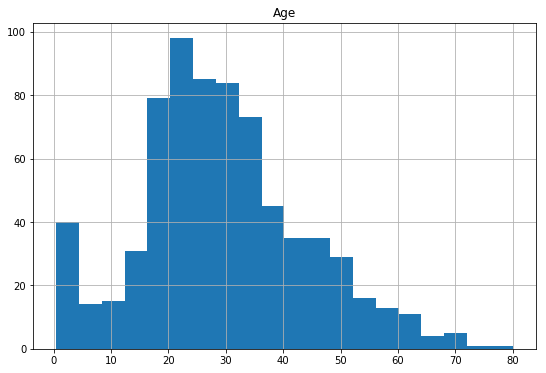

In [26]:
df.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

From the histogram, we see that ages between 20 and 30 are the most common, so filling in missing values with a central number like the mean or median wouldn't be entirely unreasonable. Let's fill in the missing values with the median value of 28:

In [27]:
new_age_var = np.where(df["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       df["Age"])     # Value if check is false

df["Age"] = new_age_var 

df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Since we just added a bunch of 28s to age, let's look at the histogram again for a sanity check. The bar representing 28 to be much taller this time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009479630>]], dtype=object)

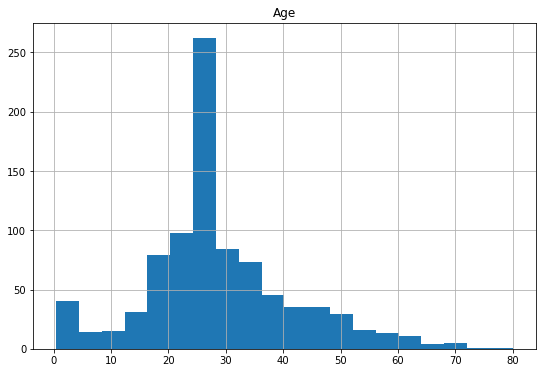

In [28]:
df.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

Next, let's consider outliers. Outliers are extreme numerical values: values that lie far away from the typical values a variable takes on. Creating plots is one of the quickest ways to detect outliers. For instance, the histogram above shows that 1 or 2 passengers were near age 80. Ages near 80 are uncommon for this data set, but in looking at the general shape of the data seeing one or two 80 year olds doesn't seem particularly surprising.

Now let's investigate the "Fare" variable. This time we'll use a boxplot, since boxplots are designed to show the spread of the data and help identify outliers:

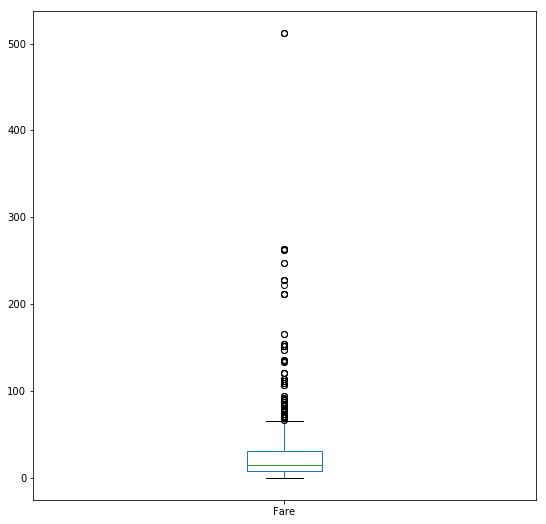

In [29]:
df["Fare"].plot(kind="box",
                           figsize=(9,9))

This is a clear indication of outliers. For interest's sake, let's check the name of this high roller:

In [30]:
index = np.where(df["Fare"] == max(df["Fare"]) )

df.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


In the graph there appears to be on passenger who paid more than all the others, but the output above shows that there were actually three passengers who all paid the same high fare.

Similar to NA values, there's no single cure for outliers. You can keep them, delete them or transform them in some way to try to reduce their impact. Even if you decide to keep outliers unchanged it is still worth identifying them since they can have disproportionately large influence on your results. Let's keep the three high rollers unchanged.

Data sets can have other strange values beyond missing values and outliers that you may need to address. Sometimes data is mislabeled or simply erroneous; bad data can corrupt any sort of analysis so it is important to address these sorts of issues before doing too much work.

## 5. Should I Create New Variables?

The variables present when you load a data set aren't always the most useful variables for analysis. Creating new variables that are derivations or combinations existing ones is a common step to take before jumping into an analysis or modeling task.

Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new variable, Family, that combines SibSp and Parch to indicate the total number of family members (siblings, spouses, parents and children) a passenger has on board:

In [31]:

df["Family"] = df["SibSp"] + df["Parch"]

In [32]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,1
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,0
5,0,Class3,"Moran, Mr. James",male,28.0,0,0,8.4583,n,Q,0
6,0,Class1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E,S,0
7,0,Class3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,n,S,4
8,1,Class3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,n,S,2
9,1,Class2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,n,C,1


For interest's sake, let's find out who had the most family members on board:

In [33]:
most_family = np.where(df["Family"] == max(df["Family"]))

df.ix[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10
